In [4]:
!pip install folium

In [13]:
import pandas as pd
import numpy as np
import csv
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import urllib.request
import json
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
print('Libraries imported.')

Libraries imported.


Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?
These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

Review criteria
less 
This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

For this week, you will required to submit the following:

A description of the problem and a discussion of the background. (15 marks)
A description of the data and how it will be used to solve the problem. (15 marks)
For the second week, the final deliverables of the project will be:

A link to your Notebook on your Github repository, showing your code. (15 marks)
A full report consisting of all of the following components (15 marks):
Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data.
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.
3. Your choice of a presentation or blogpost. (10 marks)

# Comparing Cities in the European Union (EU) 

## Background

The European Union (EU) is a unique economic and political entity consisted of 27 EU countries that cover much of the european continent (Source: EU's official web page, https://europa.eu/european-union/about-eu/eu-in-brief_en). The predecessor, European Economic Community (EEC), was created in 1958 after the Second World War, and initially increasing economic cooperation between six countries: Belgium, Germany, France, Italy, Luxembourg and the Netherlands.Since then 22 more countries joined the EU. Initially the EEC was begun  as a purely economic union and it has been evolved into an organization expanding policy areas, from climate, environment and health to external relations and security, justice and migration. In 1993, the name EEC was changed to EU. The EU consists 27 countries now after the exiting of Great Bretain in January, 2020.The Schengen Area, an area without internal borders, an area within which citizens, many non-EU nationals, business people and tourists can freely travel without being subjected to border checks. 

## Aim 
Because the EU countries, under the Schengen Area, has allowed free circulation of citizens, and non-citizens within the EU, there is a diverse population that belongs to different ethnic groups, religions, cultures. About  400 million of the population within EU belong to 12 major nationalities, and about 60 million belong to minor ethnic groups (based on nationality). In addition there is growing business opportunities within EU countries.

Objective of this project is two fold. 
**Aim 1:** To analyze some available data in these countries to evaluate simmilarities and/or dissimilarities between the cities within EU contries. A collection of 93 cities are used in the analysis. 
**Aim 2:** To evaluate venue data between select cities (based on higher population) to determine the most suitable city to open a restaurant based on city's cultural diversity depending current cuisine options. 

## Methods: 
To achieve these goals, the following strategy was used:
### A. Data Collection and Wrangling
1. EU city data has been collected from Wikipedia
   - Link: https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country
   - Webscrape tables (country, city data, which include additional demographic data.) 
2. Data wrangling to create a clean Pandas dataframes for european cities data.

### B. Geographical Coordinates and Venue Data
3. Use Geo Location data
   - The geographical coordinates for European cities has been obtained from the GeoPy library in python. This data    is used for plotting the map of European cities using the Folium library in python. The geocoder library in        python has been used to obtain latitude and longitude data for various neighborhoods in European cities.
4. Use Foursquare API to extract Venue data
   - Venue data will be used for comparing the 93 cities. 
   - dditional efforts will be made to evaluate other information available from Foursquare API such as residence etc.
   
### C. Cluster Analysis
5. Compare cities through K-means clustering.
   - Venue data will be used to compare the 93 cities
   - Compare select 2-3 cities (dissimilar and/ or similar) that have been clustered together (for similarity) or        differently (dissimilarity). 
   - Efforts will be made to compare cities within the same country if they will be found to be in different  
     clusters 
6. Identify a city and which type of restaurant that can be opened in the city based on venue data clustered in #5.

### D. Other Analysis
Statistical analysis methods such as multivariate data analysis will be explored by using additional EU data. 

## Demographics in European Union

#### Source:https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country

In [14]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country'
df = pd.read_html(url)[1]
df.head()

,Member State,Population,Percentof total EU-27 pop.,Total area km2,Percentof total EU-27 area,Pop. densityPeople/km2
0,European Union,445834883,100.00%,4079962,100.00%,105.3
1,Austria,8772865,1.97%,83858,1.98%,104.6
2,Belgium,11351727,2.55%,30510,0.72%,372.1
3,Bulgaria,7101859,1.59%,110912,2.62%,64.0
4,Croatia,4154213,0.93%,56594,1.34%,73.4


df[col] = df[col].map(lambda x: str(x).lstrip('*').rstrip('*'))

In [15]:
df = df.drop([0])
df.reset_index(drop=True, inplace=True)
df['Percentof total EU-27 pop.'] = df['Percentof total EU-27 pop.'].map(lambda x: str(x).rstrip('%'))
df['Percentof total EU-27 area'] = df['Percentof total EU-27 area'].map(lambda x: str(x).rstrip('%'))
df.rename(columns={'Member State': 'Country', 'Percentof total EU-27 pop.': '% Population', 'Total area km2': 'Area (km^2)', 'Percentof total EU-27 area': '% Area'}, inplace=True)
df.head()

,Country,Population,% Population,Area (km^2),% Area,Pop. densityPeople/km2
0,Austria,8772865,1.97,83858,1.98,104.6
1,Belgium,11351727,2.55,30510,0.72,372.1
2,Bulgaria,7101859,1.59,110912,2.62,64.0
3,Croatia,4154213,0.93,56594,1.34,73.4
4,Cyprus,854802,0.19,9250,0.22,92.4


In [16]:
df.shape

(27, 6)

Plot populations

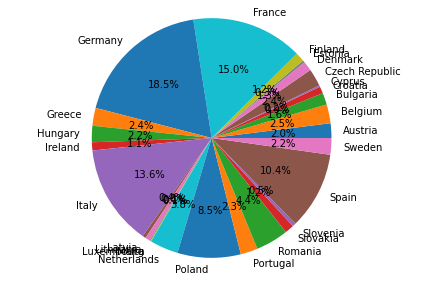

In [17]:
plt.pie(
    df['Population'],
    # with the labels being officer names
    labels=df['Country'],
    # with no shadows
    shadow=False,
    # with colors
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

plt.tight_layout()
plt.show()

If you look at the population in european cities,

In [18]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits'
df1 = pd.read_html(url)[1]
df1.head()

,City,Member State,Officialpopulation,Date of census,Reference,Photography
0,Berlin,Germany,3769495,31 December 2019,[1],NaN
1,Madrid,Spain,3348536,1 February 2020,[2],NaN
2,Rome,Italy,2856133,31 December 2018,[3],NaN
3,Bucharest,Romania,2151665,1 January 2020,[4],NaN
4,Paris,France,2140526,1 January 2019,[5][6],NaN


In [19]:
df1.shape

(93, 6)

In [20]:
df1.drop(['Date of census', 'Reference', 'Photography'], axis=1, inplace=True)
df1.rename(columns={'Member State': 'Country', 'Officialpopulation': 'Population'}, inplace=True)
df1.head()

,City,Country,Population
0,Berlin,Germany,3769495
1,Madrid,Spain,3348536
2,Rome,Italy,2856133
3,Bucharest,Romania,2151665
4,Paris,France,2140526


Plot these cities in world map to see geographical location

In [21]:
geolocator = Nominatim(user_agent="Geo_Explorer")
list_lat = [] 
list_long = []

for index, row in df1.iterrows(): # iterate over rows in dataframe

    City = row['City']
    Country = row['Country']
    Search = City+","+Country
    location = geolocator.geocode(Search)
    latitude = location.latitude
    longitude = location.longitude

    list_lat.append(latitude)
    list_long.append(longitude)

# create new columns from lists    

df1['latitude'] = list_lat   

df1['longitude'] = list_long
df1.head()

,City,Country,Population,latitude,longitude
0,Berlin,Germany,3769495,52.501522,13.402550
1,Madrid,Spain,3348536,40.416705,-3.703582
2,Rome,Italy,2856133,41.893320,12.482932
3,Bucharest,Romania,2151665,44.436141,26.102720
4,Paris,France,2140526,48.856697,2.351462


In [31]:
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, city in zip(df1['latitude'], df1['longitude'], df1['City']):
    label = '{}, {}'.format(df, City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

In [32]:
CLIENT_ID = 'QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN' # your Foursquare ID
CLIENT_SECRET = 'OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN
CLIENT_SECRET:OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232


In [33]:
df1.loc[0, 'City']

'Berlin'

In [34]:
latitude = df1.loc[0, 'latitude'] # neighborhood latitude value
longitude = df1.loc[0, 'longitude'] # neighborhood longitude value

name = df1.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Berlin are 52.5015217, 13.4025498.


In [35]:
#search_query = 'Restaurant'
#radius = 1000
#print(search_query + ' .... OK!')

In [36]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN&client_secret=OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232&v=20180605&ll=52.5015217,13.4025498&radius=1000&limit=200'

In [37]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb9d2aca614367fd9974e43'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Moritzplatz',
  'headerFullLocation': 'Moritzplatz, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 109,
  'suggestedBounds': {'ne': {'lat': 52.51052170900001,
    'lng': 13.417306838579256},
   'sw': {'lat': 52.492521690999986, 'lng': 13.387792761420743}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5138d0c6e4b03cf69cbc4441',
       'name': 'St. Agnes',
       'location': {'address': 'Alexandrinenstr. 118-121',
        'lat': 52.500645241285184,
        'lng': 13.40104614278766,
        'labeledLatLngs': [{'label': 'display',
          'lat